In [1]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats


import warnings
warnings.filterwarnings('ignore') 

df=pd.read_csv("med.csv")
df.columns


Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

# RQ: Is the mean income between men and women different? 

# HO1: The mean income is not different between men and women. Reject
# Ha1: The mean income is different between men and women. Accept

# Using researchpy as rp

In [3]:
rp.ttest(group1= df['Income'][df['Gender'] == 'Male'], group1_name= "Male",
         group2= df['Income'][df['Gender'] == 'Female'], group2_name= "Female")

(   Variable       N          Mean            SD          SE     95% Conf.  \
 0      Male  4768.0  40573.096898  28771.099841  416.666266  39756.238620   
 1    Female  5018.0  40396.425606  28144.090026  397.303035  39617.538058   
 2  combined  9786.0  40482.504568  28449.993664  287.593833  39918.761281   
 
        Interval  
 0  41389.955177  
 1  41175.313154  
 2  41046.247854  ,
               Independent t-test    results
 0  Difference (Male - Female) =    176.6713
 1          Degrees of freedom =   9784.0000
 2                           t =      0.3070
 3       Two side test p value =      0.7588
 4      Difference < 0 p value =      0.6206
 5      Difference > 0 p value =      0.3794
 6                   Cohen's d =      0.0062
 7                   Hedge's g =      0.0062
 8              Glass's delta1 =      0.0061
 9            Point-Biserial r =      0.0031)

# Interpretation:
# The mean income for males, M=40573.1, Interval is 41390), is statistically significantly higher than women, W=40396, Interval is 41175); t(9784)=.3070, p=0.4. 

In [4]:
summary, results = rp.ttest(group1= df['Income'][df['Gender'] == 'Male'], group1_name= "Male",
                            group2= df['Income'][df['Gender'] == 'Female'], group2_name= "Female")
print(summary)

   Variable       N          Mean            SD          SE     95% Conf.  \
0      Male  4768.0  40573.096898  28771.099841  416.666266  39756.238620   
1    Female  5018.0  40396.425606  28144.090026  397.303035  39617.538058   
2  combined  9786.0  40482.504568  28449.993664  287.593833  39918.761281   

       Interval  
0  41389.955177  
1  41175.313154  
2  41046.247854  


In [5]:
print(results)

              Independent t-test    results
0  Difference (Male - Female) =    176.6713
1          Degrees of freedom =   9784.0000
2                           t =      0.3070
3       Two side test p value =      0.7588
4      Difference < 0 p value =      0.6206
5      Difference > 0 p value =      0.3794
6                   Cohen's d =      0.0062
7                   Hedge's g =      0.0062
8              Glass's delta1 =      0.0061
9            Point-Biserial r =      0.0031


# Using scipy.stats as stats

In [6]:
stats.ttest_ind(df['Income'][df['Gender'] == 'Male'],
                df['Income'][df['Gender'] == 'Female'])


TtestResult(statistic=0.307039717019213, pvalue=0.7588196759412139, df=9784.0)

# Interpretation:
# There is not a statistically significance difference in average income between males and females, t=3070, p=0.4

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate

# First Continuous variable is Age

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

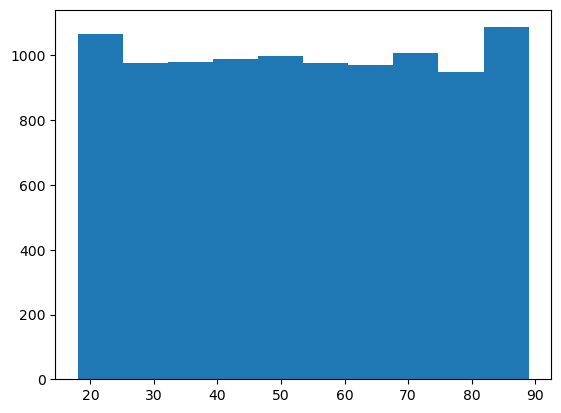

In [8]:
plt.hist(df['Age'])

In [9]:
print('Age')
print(df['Age'].describe())

Age
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


# Second Continuous Variable

(array([ 893., 1834., 1869., 1500., 1188.,  844.,  601.,  437.,  267.,
         203.,  134.,   72.,   57.,   28.,   28.,   19.,   10.,    4.,
           6.,    6.]),
 array([1.54080000e+02, 1.05088310e+04, 2.08635820e+04, 3.12183330e+04,
        4.15730840e+04, 5.19278350e+04, 6.22825860e+04, 7.26373370e+04,
        8.29920880e+04, 9.33468390e+04, 1.03701590e+05, 1.14056341e+05,
        1.24411092e+05, 1.34765843e+05, 1.45120594e+05, 1.55475345e+05,
        1.65830096e+05, 1.76184847e+05, 1.86539598e+05, 1.96894349e+05,
        2.07249100e+05]),
 <BarContainer object of 20 artists>)

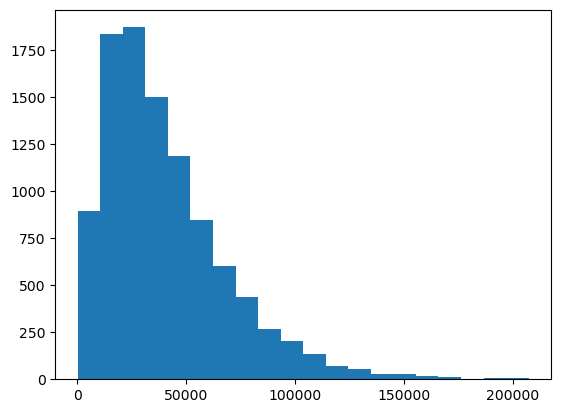

In [10]:
plt.hist(df['Income'], bins=20)

In [11]:
print('Income')
print(df['Income'].describe())

Income
count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


# First Categorical variable

(array([1961.,    0., 2023.,    0.,    0., 2045.,    0., 1984.,    0.,
        1987.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

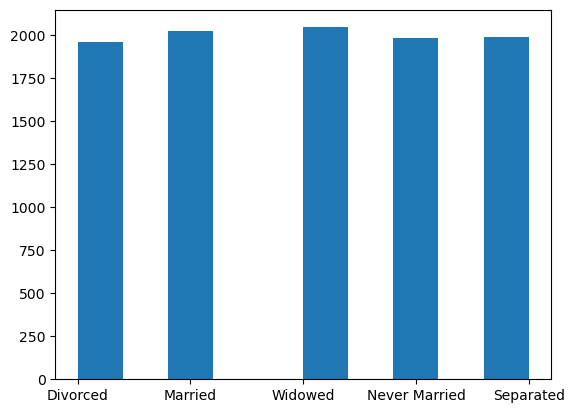

In [12]:
plt.hist(df['Marital'])

In [13]:
print('Marital')
print(df['Marital'].describe())

Marital
count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object


(array([4768.,    0.,    0.,    0.,    0., 5018.,    0.,    0.,    0.,
         214.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

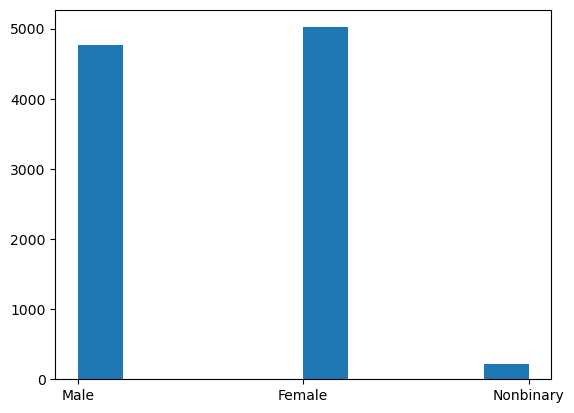

In [14]:
plt.hist(df['Gender'])

# Bivariate

In [15]:
print('Gender')
print(df['Gender'].describe())


Gender
count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object


In [16]:
print(df['Income'].describe())

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


<Axes: xlabel='Income', ylabel='Gender'>

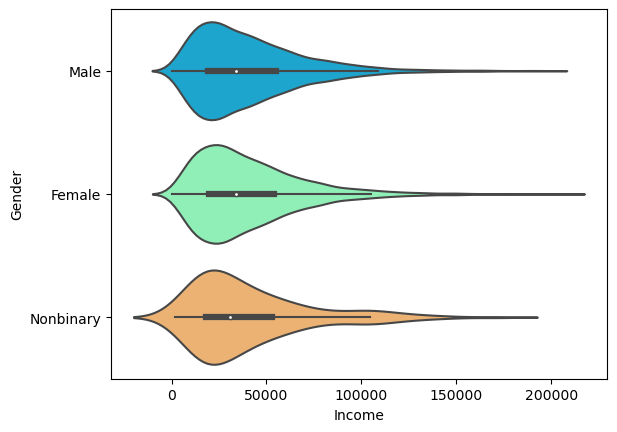

In [17]:
sns.violinplot(x='Income', y='Gender', data=df,palette='rainbow')

<Axes: xlabel='Gender', ylabel='Income'>

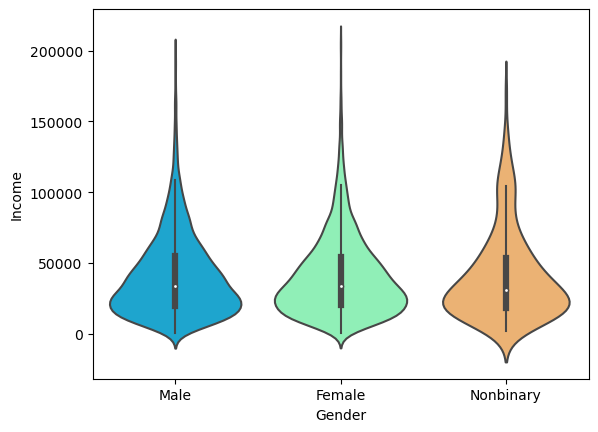

In [18]:
sns.violinplot(x='Gender', y='Income', data=df,palette='rainbow')

<Axes: xlabel='ReAdmis', ylabel='VitD_levels'>

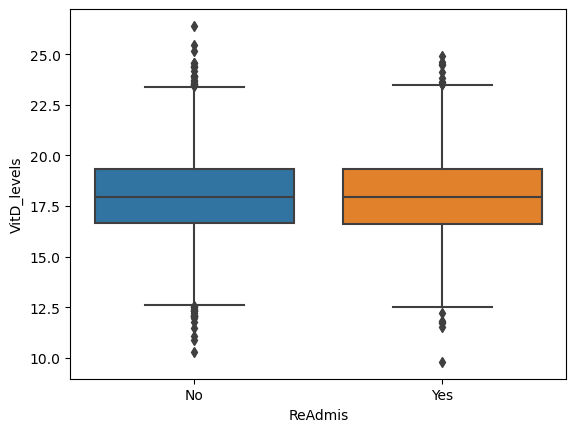

In [19]:
sns.boxplot(x='ReAdmis', y='VitD_levels', data=df)

<Axes: xlabel='VitD_levels', ylabel='ReAdmis'>

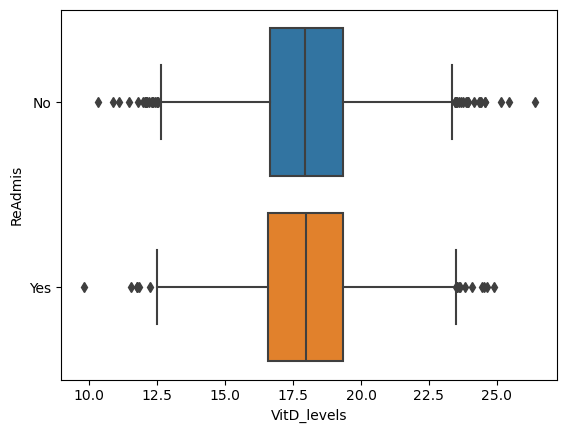

In [20]:
sns.boxplot(x='VitD_levels', y='ReAdmis', data=df)

In [21]:
print(df['ReAdmis'].describe())

count     10000
unique        2
top          No
freq       6331
Name: ReAdmis, dtype: object


In [22]:
print(df['VitD_levels'].describe())

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64


In [23]:
print(df['VitD_levels'].mean())

17.964261654863


In [24]:
corr = df[['Age', 'Income', 'Population']].corr()
corr

,Age,Income,Population
Age,1.000000,-0.012228,-0.018987
Income,-0.012228,1.000000,0.005426
Population,-0.018987,0.005426,1.000000


# Let's find the strength of the relationship between two categorical variables using Chi-Square Test of independence

In [25]:
from scipy.stats import chi2_contingency

In [26]:
# We calculate the cross_tab to determine the frequency

In [27]:
cross_tab=pd.crosstab(index=df['Gender'],columns=df['Marital'])
cross_tab

Marital,Divorced,Married,Never Married,Separated,Widowed
Gender,,,,,
Female,984,993,994,1017,1030
Male,922,997,957,927,965
Nonbinary,55,33,33,43,50


In [28]:
chi_sq_result=chi2_contingency(cross_tab)

In [29]:
p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"

In [30]:
print(f"The p-value is {chi_sq_result[1]} and hence we {x} the null Hypothesis with {chi_sq_result[2]} degrees of freedom")

The p-value is 0.13677965035207762 and hence we accept the null Hypothesis with 8 degrees of freedom


In [31]:
import numpy as np

In [32]:
#df['random'] = np.random.randint(0,3, size = df.shape[0])
#df.head()

In [33]:
def is_related(x,y):
    ct=pd.crosstab(index=df[x],columns=df[y])
    chi_sq_result = chi2_contingency(ct,)
    p, x = chi_sq_result[1], "related" if chi_sq_result[1] < 0.05 else "is not related"
    return p,x

In [34]:
is_related('Gender', 'Marital', )

(0.13677965035207762, 'is not related')

In [36]:
is_related('City', 'State', )

(0.0, 'related')

In [37]:
is_related('ReAdmis', 'Marital')

(0.278667196190538, 'is not related')

In [39]:
is_related('Soft_drink', 'HighBlood')

(0.5554604421280369, 'is not related')

In [41]:
is_related('Anxiety', 'Diabetes')

(0.8189511056349614, 'is not related')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom